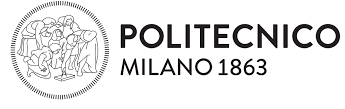

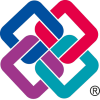


##### PhD Candidate Jacopo Cassandro

# IFC relation cost - obj ITCON2024

1. Import all needed python libraries

In [1]:
# importo file ifc
import ifcopenshell
import ifcopenshell.util
import ifcopenshell.util.element

File Name

In [2]:
name_output = "20240424_TEST link cost-obj"

2. Open the geometric pattern to add price items to

In [3]:
#percorso modello geometrico
# ifcmodel = ifcopenshell.open("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/IFC/STR_PSC_Uffici_2022_IFC4.ifc")

ifcmodel = ifcopenshell.open("C:/Users/jacop/OneDrive - Politecnico di Milano/00-Pubblicazioni/00-01_Articoli - Jacopo Cassandro/08_Journal_ITCON_2024_IFC cost/Modello/20240414.ifc")

print("\.done")

\.done


In [4]:
ifc_version = ifcmodel.schema

print(ifc_version)

IFC4


3. Print the total number of unique entity and create a set of all entities in the IFC model

In [5]:
#CREO LISTA DI TUTTE LE CLASSI PRESENTI NEL MODELLO

class_names = set()  # Use a set to store unique class names

# # Iterate over all objects in the model
# for product in ifcmodel:
#     class_name = product.is_a(IfcElement)  # Get the class name of each object
#     class_names.add(class_name)  # Add the class name to the set

# Iterate over all element in the model
for product in ifcmodel.by_type("IfcElement"):
    if product.is_a() != "IfcOpeningElement":  # Escludiamo IfcOpeningElement dalla lista
        class_name = product.is_a()  # Otteniamo il nome della classe di ogni oggetto
        class_names.add(class_name)  # Aggiungiamo il nome della classe al set

# Print the number of unique class names
print("Number of unique class names:", len(class_names))

# Print the list of class names
print(class_names)

#print("Unique class names:")
#for class_name in class_names:
#    print(class_name)


Number of unique class names: 5
{'IfcRoof', 'IfcWall', 'IfcSlab', 'IfcStair', 'IfcStairFlight'}


3.1 Print the total number of uniwue entity IfcSIUnit

In [6]:
#trova tutte le IfcSIUnit già a modello
# Lista per memorizzare gli oggetti IfcSIUnit
ifc_si_units = []

# Itera su tutti gli oggetti nel modello
for obj in ifcmodel:
    if obj.is_a() == "IfcSIUnit":
        # Assegna l'oggetto a una variabile
        current_ifc_si_unit = obj
        
        # Aggiungi l'oggetto alla lista
        ifc_si_units.append(current_ifc_si_unit)

# Ora puoi accedere alle proprietà di ciascun oggetto IfcSIUnit
for i, ifc_si_unit in enumerate(ifc_si_units):
    print(f"Proprietà dell'oggetto {i}:")

    # Accesso alle proprietà specifiche di IfcSIUnit
    unit_name = ifc_si_unit.Name if hasattr(ifc_si_unit, "Name") else None
    unit_type = ifc_si_unit.UnitType if hasattr(ifc_si_unit, "UnitType") else None
    unit_prefix = ifc_si_unit.Prefix if hasattr(ifc_si_unit, "Prefix") else None

    # Stampa le proprietà
    print(f"Name: {unit_name}")
    print(f"UnitType: {unit_type}")
    print(f"Prefix: {unit_prefix}")
    print(f"Entity: {ifc_si_unit}")
    print("="*20)

#     if unit_name == "SQUARE_METRE" and unit_type == "AREAUNIT":
#         area_unit = ifc_si_unit
#         print("Area Unit esiste:")
#         print(area_unit)
#         # Puoi fare ulteriori operazioni con area_unit qui
#         break  # Esci dal ciclo se hai trovato l'Area Unit
# else:
#     print("Area Unit non esiste. Scrivi a.")


Proprietà dell'oggetto 0:
Name: PASCAL
UnitType: PRESSUREUNIT
Prefix: None
Entity: #75=IfcSIUnit(*,.PRESSUREUNIT.,$,.PASCAL.)
Proprietà dell'oggetto 1:
Name: CANDELA
UnitType: LUMINOUSINTENSITYUNIT
Prefix: None
Entity: #58=IfcSIUnit(*,.LUMINOUSINTENSITYUNIT.,$,.CANDELA.)
Proprietà dell'oggetto 2:
Name: LUMEN
UnitType: LUMINOUSFLUXUNIT
Prefix: None
Entity: #57=IfcSIUnit(*,.LUMINOUSFLUXUNIT.,$,.LUMEN.)
Proprietà dell'oggetto 3:
Name: LUX
UnitType: ILLUMINANCEUNIT
Prefix: None
Entity: #56=IfcSIUnit(*,.ILLUMINANCEUNIT.,$,.LUX.)
Proprietà dell'oggetto 4:
Name: NEWTON
UnitType: FORCEUNIT
Prefix: KILO
Entity: #55=IfcSIUnit(*,.FORCEUNIT.,.KILO.,.NEWTON.)
Proprietà dell'oggetto 5:
Name: WATT
UnitType: POWERUNIT
Prefix: None
Entity: #54=IfcSIUnit(*,.POWERUNIT.,$,.WATT.)
Proprietà dell'oggetto 6:
Name: VOLT
UnitType: ELECTRICVOLTAGEUNIT
Prefix: None
Entity: #53=IfcSIUnit(*,.ELECTRICVOLTAGEUNIT.,$,.VOLT.)
Proprietà dell'oggetto 7:
Name: AMPERE
UnitType: ELECTRICCURRENTUNIT
Prefix: None
Entity: #52

4. Extraction of the classes to which price items will be associated. Through user input I identify IFC classes and create lists based on entity names (example I find all the ifcslab entities inside the model and create a list called ifcslab that contains them all) and then collect all the different lists within a single dictionary. Specifically in this code I get the number of how many entities are present within the various lists created

In [7]:
# ESTRAGGO LE CLASSI DESIDERATE E CREO DELLE LISTE SEPARATE
class_lists = {}  # Utilizziamo un dizionario per memorizzare le liste delle istanze per ogni classe
type_lists = {}   # Utilizziamo un dizionario per memorizzare le liste delle istanze per ogni tipo

# Memorizzare le istanze per ogni classe e tipo
for product in ifcmodel.by_type("IfcElement"):
    class_name = product.is_a()
    
    # Escludi IfcOpeningElement
    if class_name == "IfcOpeningElement":
        continue
        
    if class_name not in class_lists:
        class_lists[class_name] = []

    class_lists[class_name].append(product)

    # Verifica se l'oggetto ha un tipo definito
    if product.ObjectType:
        type_name = product.ObjectType
        if type_name not in type_lists:
            type_lists[type_name] = []

        type_lists[type_name].append(product)

# Stampa le istanze per ogni classe con il nome della classe in grassetto
print("Istanze per ogni classe:")
for class_name, instances_list in class_lists.items():
    print("\033[1m" + f"{class_name}:" + "\033[0m" + f" {len(instances_list)} istanze")
#     for instance in instances_list:
#         print(f"  - {instance}")

# Stampa le istanze per ogni classe con il nome della classe in grassetto
print()
print("Istanze per ogni classe:")
for type_name in sorted(type_lists.keys()):
    instances_list = type_lists[type_name]
    print("\033[1m" + f"{type_name}:" + "\033[0m" + f" {len(instances_list)} istanze")
#     for instance in instances_list:
#         print(f"  - {instance}")

Istanze per ogni classe:
IfcWall: 27 istanze
IfcSlab: 6 istanze
IfcStair: 1 istanze
IfcStairFlight: 2 istanze
IfcRoof: 1 istanze

Istanze per ogni classe:
Muro di base:MUR_INT_LT_15_IN1,5_LT12_IN1,5: 12 istanze
Muro di base:MUR_STR_CA_30_CA30: 15 istanze
Pavimento:PAV_ARI_GR_20,5_GR1,5_CS5_RD4_XP10: 1 istanze
Pavimento:PAV_ARI_PL_20_CA6_PL14: 1 istanze
Pavimento:PAV_STR_LT_30_CA5_LT25: 1 istanze
Pianerottolo monolitico:Spessore 30 cm: 1 istanze
Platea:FND_MGR_10: 1 istanze
Platea:FND_PLA_30: 1 istanze
Rampa monolitica:2 cm pedata 2 cm alzata 15 cm profondità strutturale: 2 istanze
Scala gettata in opera:Cls - Alzata Max 17,5 cm - Pedata 30 cm: 1 istanze
Tetto di base:Latero Cementizio - 27 cm: 1 istanze


5. Print the lists just defined going to identify individual entities. Entities are divided by class (ifcwall, ifcslab, ...) and then by PredefinedType (BASESLAB, FLOOR, SOLIDWALL, ...). Thus, a dictionary of PredefineType is also created

In [8]:
# STAMPA LISTA DI IFCSLAB, SOTTOLISTA DI PREDEFINED TYPE E STAMPA LE ENTITà ASSOCIATE A QUESTE

predefined_type_lists = {}  # Utilizziamo un dizionario per memorizzare le liste dei predefined type

for class_name, class_list in class_lists.items():
    if class_list:
        # Creazione del dizionario per le liste dei PredefinedType
        predefined_type_lists[class_name] = {}

        # Estrai i valori PredefinedType e ObjectType presenti in ogni entità della lista
        for entity in class_list:
            predefined_type = entity.PredefinedType
            object_type = entity.ObjectType

            # Verifica se il PredefinedType è già presente nel dizionario
            if predefined_type:
                if predefined_type not in predefined_type_lists[class_name]:
                    predefined_type_lists[class_name][predefined_type] = {}  # Creazione del dizionario per ObjectType

                # Verifica se l'ObjectType è già presente nel dizionario
                if object_type:
                    if object_type not in predefined_type_lists[class_name][predefined_type]:
                        predefined_type_lists[class_name][predefined_type][object_type] = []  # Creazione della lista per le entità

                    # Aggiungi l'entità alla sottolista corrispondente al ObjectType
                    entity_list = predefined_type_lists[class_name][predefined_type][object_type]
                    entity_list.append(entity)

# Stampa le sottoliste con le entità complete divise per nome
if predefined_type_lists:
    print("Sublists based on entity names:")
    for class_name, predefined_type_dict in predefined_type_lists.items():
        print("Class:", class_name)
        for predefined_type, object_type_dict in predefined_type_dict.items():
            print("  PredefinedType:", predefined_type)
            for object_type, entity_list in object_type_dict.items():
                print("    ObjectType:", object_type)
                for entity in entity_list:
                    print("      -", entity)
                print()  # Aggiunge una riga vuota tra le sottoliste degli ObjectType
else:
    print("No PredefinedType lists found.")


Sublists based on entity names:
Class: IfcWall
  PredefinedType: NOTDEFINED
    ObjectType: Muro di base:MUR_STR_CA_30_CA30
      - #588=IfcWall('212O8SynL5OfOqjco_P67g',#21,'Muro di base:MUR_STR_CA_30_CA30:137578',$,'Muro di base:MUR_STR_CA_30_CA30',#484,#587,'137578',.NOTDEFINED.)
      - #697=IfcWall('212O8SynL5OfOqjco_P64Q',#21,'Muro di base:MUR_STR_CA_30_CA30:137626',$,'Muro di base:MUR_STR_CA_30_CA30',#625,#696,'137626',.NOTDEFINED.)
      - #826=IfcWall('212O8SynL5OfOqjco_P65O',#21,'Muro di base:MUR_STR_CA_30_CA30:137688',$,'Muro di base:MUR_STR_CA_30_CA30',#726,#825,'137688',.NOTDEFINED.)
      - #906=IfcWall('212O8SynL5OfOqjco_P6AE',#21,'Muro di base:MUR_STR_CA_30_CA30:137742',$,'Muro di base:MUR_STR_CA_30_CA30',#855,#905,'137742',.NOTDEFINED.)
      - #965=IfcWall('212O8SynL5OfOqjco_P6B7',#21,'Muro di base:MUR_STR_CA_30_CA30:137799',$,'Muro di base:MUR_STR_CA_30_CA30',#936,#964,'137799',.NOTDEFINED.)
      - #1064=IfcWall('212O8SynL5OfOqjco_P6Bv',#21,'Muro di base:MUR_STR_CA_

6. Analyze the individual entities stored within specific lists and specifically analyze the Pset containing the Single Value "loadbearing" to verify if the entities analyzed are actually structural elements or not.
Through a dynamic interface, I first select the relevant entity, then identify the associated QSETs to view the quantities of the object. I choose the specific quantity to include in the metric computation. Then, I access the cost database and select the unit price entry for the object under examination. I create a new cost entity within the current project, where the quantity is set to specific computation formulas based on individual quantities extracted from objects, and the cost value is extracted from the unit price. Multiple cost entities can be associated with the same geometric entity.

In [9]:
#SELEZIONO ENTITA E QSET CHE VERRA RICHIAMATO NEL COST ITEM DA COMPUTO METRICO
# Def per cordice

# Sequenze di escape ANSI per il grassetto e il colore rosso
BOLD_RED = '\033[1;31m'
COLOR_RESET = '\033[0m'

def get_property_sets(selected_entity):
    property_sets = []

    for rel in selected_entity.IsDefinedBy:
        if rel.is_a("IFCRelDefinesByProperties"):
            relating_property = rel.RelatingPropertyDefinition
            if relating_property.is_a("IFCPropertySet"):
                property_sets.append((rel, relating_property, "Property Set"))

    return property_sets

def get_quantity_sets(selected_entity):
    quantity_sets = []

    for rel in selected_entity.IsDefinedBy:
        if rel.is_a("IFCRelDefinesByProperties"):
            relating_property = rel.RelatingPropertyDefinition
            if relating_property.is_a("IFCElementQuantity"):
                quantity_sets.append((rel, relating_property, "Quantity Set"))
    return quantity_sets
                                    
def select_entity(entity_list):
    entity_choice = input("Select an Entity: ")

    if entity_choice.isdigit() and 1 <= int(entity_choice) <= len(entity_list):
        selected_entity = entity_list[int(entity_choice) - 1]
        print()
        print(f"You selected Entity: {selected_entity}")
        return selected_entity
    else:
        print("Invalid choice for Entity.")
        return None

def select_property_set(property_sets, set_name):
    selected_set = None
    for rel, set_obj, set_type in property_sets:
        if set_obj.Name == set_name:
            selected_set = set_obj
            break

    return selected_set

def crea_unit_of_measure(ifcmodel, unit_type, name, prefix):
    # Crea UNIT OF MEASURE
    unit_of_measure = ifcmodel.createIfcSIUnit()
    unit_of_measure.UnitType = unit_type
    unit_of_measure.Prefix = prefix
    unit_of_measure.Name = name

    return unit_of_measure

def trova_o_crea_unita_misura(ifc_si_units, ifc_model, unit_name, unit_type, unit_prefix):
    for ifc_si_unit in ifc_si_units:
        # Accesso alle proprietà specifiche di IfcSIUnit
        existing_name = ifc_si_unit.Name if hasattr(ifc_si_unit, "Name") else None
        existing_type = ifc_si_unit.UnitType if hasattr(ifc_si_unit, "UnitType") else None
        existing_prefix = ifc_si_unit.Prefix if hasattr(ifc_si_unit, "Prefix") else None
        
        if existing_name == unit_name and existing_type == unit_type and existing_prefix == unit_prefix:
            # Restituisci l'unità di misura esistente se trovata
            return ifc_si_unit
    
    # Se non trovi un'unità di misura esistente, creala
    new_unit = crea_unit_of_measure(ifc_model, unit_type, unit_name, unit_prefix)

    return new_unit

def crea_qto_volume(ifcmodel, unit_of_measure, name, description, volume_value, formula):
    # Crea QTO Volume
    qto_volume = ifcmodel.createIfcQuantityVolume()
    qto_volume.Name = name
    qto_volume.Description = description
    qto_volume.Unit = unit_of_measure
    qto_volume.VolumeValue = volume_value
    qto_volume.Formula = formula

    return qto_volume

def crea_qto_area(ifcmodel, unit_of_measure, name, description, area_value, formula):
    # Crea QTO Volume
    qto_area = ifcmodel.createIfcQuantityArea()
    qto_area.Name = name
    qto_area.Description = description
    qto_area.Unit = unit_of_measure
    qto_area.AreaValue = area_value
    qto_area.Formula = formula

    return qto_area

def crea_qto_weight(ifcmodel, unit_of_measure, name, description, weight_value, formula):
    # Crea QTO Volume
    qto_weight = ifcmodel.createIfcQuantityWeight()
    qto_weight.Name = name
    qto_weight.Description = description
    qto_weight.Unit = unit_of_measure
    qto_weight.WeightValue = weight_value
    qto_weight.Formula = formula

    return qto_weight

# Funzione per stampare il testo in rosso
def print_red(text):
    RED = '\033[91m'
    RESET = '\033[0m'
    print(f"{RED}{text}{RESET}")


    
    
# Menu per la scelta della lista da visualizzare
from ifcopenshell import open as ifc_open
import os

class_names = list(predefined_type_lists.keys())

structural_objects = {}
non_structural_objects = {}

while True:
    print("Classes:")
    for i, class_name in enumerate(class_names):
        print(f"{i + 1}. {class_name}")

    class_choice = input("Select a class (or 'exit' to quit): ")

    if class_choice.lower() == 'exit':
        break
    if class_choice.isdigit() and 1 <= int(class_choice) <= len(class_names):
        class_name = class_names[int(class_choice) - 1]
        print(f"You selected Class: {class_name}")

        predefined_type_dict = predefined_type_lists[class_name]
        predefined_types = list(predefined_type_dict.keys())

        if not entity_list:
            print("No predefined types found for the selected class.")
            print()
            continue
        
        while True:
            print("Predefined Types:")
            for i, predefined_type in enumerate(predefined_types):
                print(f"{i + 1}. {predefined_type}")

            predefined_type_choice = input("Select a Predefined Type (or 'back' to go back): ")

            if predefined_type_choice.lower() == 'back':
                break

            if predefined_type_choice.isdigit() and 1 <= int(predefined_type_choice) <= len(predefined_types):
                predefined_type = predefined_types[int(predefined_type_choice) - 1]
                print(f"You selected Predefined Type: {predefined_type}")

                object_types = list(predefined_type_dict[predefined_type].keys())

                if not object_types:
                    print("No object types found for the selected Predefined Type.")
                    print()
                    continue

            while True:
                print("Object Type:")
                for i, object_type in enumerate(object_types):
                    print(f"{i + 1}. {object_type}")

                object_type_choice = input("Select an Object Type (or 'back' to go back): ")

                if object_type_choice.lower() == 'back':
                    break
                if object_type_choice.isdigit() and 1 <= int(object_type_choice) <= len(object_types):
                    selected_object_type = object_types[int(object_type_choice) - 1]
                    print(f"You selected Object Type: {selected_object_type}")

                    entity_list = predefined_type_dict[predefined_type][selected_object_type]

                    if not entity_list:
                        print("No entities found for the selected Object Type.")
                        print()
                        continue
                    
                    while True:
                        print(f"Processing entities for the {selected_object_type} Object Type of Class: {class_name}")


                        for i, entity in enumerate(entity_list):
                            print(f"{i + 1}. {entity}")

                            property_sets = get_property_sets(entity)

                            if not property_sets:
                                print("No Entity found.")
                                print()
                                choice = input("Continue selecting entities? (yes/no): ")
                                if choice.lower() != 'yes':
                                    break
                                else:
                                    continue

                            selected_sets = []

                            for rel, set_obj, set_type in property_sets:
                                if set_obj.Name in ["Pset_SlabCommon", "Pset_WallCommon", "Pset_ColumnCommon", "Pset_BeamCommon"]:
                                    selected_sets.append(set_obj)

                            if selected_sets:
                                for selected_set in selected_sets:
                                    #print("Selected Property Set:", selected_set.Name)

                                    loadbearing_property = None

                                    for property in selected_set.HasProperties:
                                        if property.is_a("IfcPropertySingleValue") and property.Name == "LoadBearing":
                                            loadbearing_property = property
                                            break

                                    if loadbearing_property:
                                        #print("LoadBearing property found!")
                                        #print("Property:", loadbearing_property)
                                        if hasattr(loadbearing_property, "NominalValue"):
                                            nominal_value = loadbearing_property.NominalValue
                                            #print("NominalValue:", nominal_value)
                                            value = nominal_value.wrappedValue
                                            #print("Value:", value)

                                            if value == True:
                                                print()
                                                print(entity.is_a(), "selected is structural")
                                                print(entity)
                                                print()

                                                if class_name in structural_objects:
                                                    structural_objects[class_name].append(entity)
                                                else:
                                                    structural_objects[class_name] = [entity]
                                            else:
                                                print()
                                                print(entity.is_a(), "selected is non-structural")
                                                print(entity)
                                                print()

                                                if class_name in non_structural_objects:
                                                    non_structural_objects[class_name].append(entity)
                                                else:
                                                    non_structural_objects[class_name] = [entity]


#                         if class_name in structural_objects:
                        # RICERCA QSET e seleziona qset interessato a cui sarà associato costo
                        quantity_dict_list = []  # Lista per archiviare i dizionari dei risultati per ogni entità
                        while True:
                            # Itera su tutte le entità della lista
                            for entity in entity_list:
                                # RICERCA QSET e seleziona qset interessato a cui sarà associato costo
                                if entity:
                                    quantity_sets = get_quantity_sets(entity)

                                    if quantity_sets:
                                        selected_rel, selected_set, selected_type = quantity_sets[0]  # Selezione automatica del primo QSET
                #                                 print(f"Selected Quantity Set for {entity.Name}: {selected_set.Name} ({selected_type})")

                                        if hasattr(selected_rel, 'RelatingPropertyDefinition'):
                                            relating_property_definition = selected_rel.RelatingPropertyDefinition

                                            if relating_property_definition.is_a("IfcElementQuantity"):
                                                if hasattr(relating_property_definition, 'Quantities'):
                                                    quantities = relating_property_definition.Quantities

                                                    quantity_dict = {}

                                                    for i, quantity in enumerate(quantities):
                                                        #print(quantity.Name)

                                                        if quantity.Name == "NetVolume":
                                                            volume = quantity
                                                            volume_value = quantity.VolumeValue
                                                            quantity_dict.update(NetVolume=volume_value)
                                                        elif quantity.Name == "Depth":
                                                            depth = quantity
                                                            depth_value = quantity.LengthValue
                                                            quantity_dict.update(Depth=depth_value)
                                                        elif quantity.Name == "Perimeter":
                                                            perimeter = quantity
                                                            perimeter_value = quantity.LengthValue
                                                            quantity_dict.update(Perimeter=perimeter_value)
                                                        elif quantity.Name == "Length":
                                                            length = quantity
                                                            length_value = quantity.LengthValue
                                                            quantity_dict.update(Length=length_value)
                                                        elif quantity.Name == "Width":
                                                            width = quantity
                                                            width_value = quantity.LengthValue
                                                            quantity_dict.update(Width=width_value)
                                                        elif quantity.Name == "GrossArea":
                                                            area = quantity
                                                            area_value = quantity.AreaValue
                                                            quantity_dict.update(GrossArea=area_value)
                                                        elif quantity.Name == "OuterSurfaceArea":
                                                            outher_surface_area = quantity
                                                            outher_surface_area_value = quantity.AreaValue
                                                            quantity_dict.update(OuterSurfaceArea=outher_surface_area_value)
                                                        elif quantity.Name == "Height":
                                                            height = quantity
                                                            height_value = quantity.LengthValue
                                                            quantity_dict.update(Height=height_value)
                                                        elif quantity.Name == "NetSideArea":
                                                            sidearea = quantity
                                                            sidearea_value = quantity.AreaValue
                                                            quantity_dict.update(NetSideArea=sidearea_value)
                                                        elif quantity.Name == "ProjectedArea":
                                                            roofarea = quantity
                                                            roofarea_value = quantity.AreaValue
                                                            quantity_dict.update(ProjectedArea=roofarea_value)


                                                    print(quantity_dict)
                                                    quantity_dict_list.append(quantity_dict)

                            # Alla fine del ciclo, hai una lista di dizionari, uno per ogni entità
                #                     print("\nSummary of Quantity Data:")
                #                     for i, quantity_dict in enumerate(quantity_dict_list, 1):
                #                         print(f"{i}. {quantity_dict}")



                            # Dichiarazione di una lista per memorizzare le nuove quantità
                            new_quantities_list = []

                            # Itera su tutte le entità presenti in quantity_dict_list

                            for quantity_dict in quantity_dict_list:
                                # Estrai le informazioni necessarie dal dizionario quantity_dict
                                #entity = quantity_dict.get("entity")
                                volume_value = quantity_dict.get("NetVolume", None)
                                depth_value = quantity_dict.get("Depth", None)
                                perimeter_value = quantity_dict.get("Perimeter", None)
                                length_value = quantity_dict.get("Length", None)
                                width_value = quantity_dict.get("Width", None)
                                area_value = quantity_dict.get("GrossArea", None)
                                outher_surface_area_value = quantity_dict.get("OuterSurfaceArea", None)
                                height_value = quantity_dict.get("Height", None)
                                side_area_value = quantity_dict.get("NetSideArea", None)
                                roof_area_value = quantity_dict.get("ProjectedArea", None)


                                # Adattare in base ai nomi delle quantità effettive e aggiungi tutte le altre

                                # Lista di tutte le quantità disponibili
                                cme_quantities = ["Volume", 
                                                  "Weight Foundations", 
                                                  "Weight Column", 
                                                  "Weight Beam", 
                                                  "Weight Wall", 
                                                  "Weight Floor",
                                                  "Wet Area Foundations", 
                                                  "Wet Area Column", 
                                                  "Wet Area Beam", 
                                                  "Wet Area Wall", 
                                                  "Wet Area Floor",
                                                  "Area Wall",
                                                  "Area Floor",
                                                  "Area Roof"]

                                # Chiedi all'utente di selezionare la quantità solo la prima volta
                                if not 'selected_quantity' in locals():
                                    print()
                                    print("Select a quantity for cost estimation:")

                                    for i, quantity in enumerate(cme_quantities):
                                        print(f"{i + 1}. {quantity}")

                                    quantity_choice = input(f"Enter the number of the quantity to select (1-{len(cme_quantities)}): ")

                                    if quantity_choice.isdigit() and 1 <= int(quantity_choice) <= len(cme_quantities):
                                        quantity_index = int(quantity_choice) - 1
                                        selected_quantity = cme_quantities[quantity_index]

                                    else:
                                        print("Invalid quantity selection. Exiting.")
                                        break


                                print(selected_quantity)
                                # Esegui operazioni in base alla quantità selezionata
                                if selected_quantity == "Volume":
                                    unit_name = "CUBIC_METRE"
                                    unit_type = "VOLUMEUNIT"
                                    volume_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        volume_value = float(volume_value * 1.1)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        volume_value = None
                                    if volume_value is not None:
                                        qto_cme = crea_qto_volume(ifcmodel, volume_unit, "Volume", "Volume of Concrete", volume_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                                        break

                                        # Aggiungi qui altre logiche per le altre quantità

                                elif selected_quantity == "Weight Foundations":
                                    unit_name = "GRAM"
                                    unit_type = "MASSUNIT"
                                    unit_prefix = "KILO"
                                    weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                                    try:
                                        weight_value = float(100 * volume_value)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        weight_value = None
                                    if weight_value is not None:
                                        qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Foundations", "Weight of Reinforcing Bars in the foundation slab", weight_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Weight Column":
                                    unit_name = "GRAM"
                                    unit_type = "MASSUNIT"
                                    unit_prefix = "KILO"
                                    weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                                    try:
                                        weight_value = float(250 * volume_value)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        weight_value = None
                                    if weight_value is not None:
                                        qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Column", "Weight of Reinforcing Bars in the column", weight_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Weight Beam":
                                    unit_name = "GRAM"
                                    unit_type = "MASSUNIT"
                                    unit_prefix = "KILO"
                                    weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                                    try:
                                        weight_value = float(250 * volume_value)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        weight_value = None
                                    if weight_value is not None:
                                        qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Beam", "Weight of Reinforcing Bars in the beam", weight_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Weight Wall":
                                    unit_name = "GRAM"
                                    unit_type = "MASSUNIT"
                                    unit_prefix = "KILO"
                                    weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                                    try:
                                        weight_value = float(185 * volume_value)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        weight_value = None
                                    if weight_value is not None:
                                        qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Wall", "Weight of Reinforcing Bars in the wall", weight_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Weight Floor":
                                    unit_name = "GRAM"
                                    unit_type = "MASSUNIT"
                                    unit_prefix = "KILO"
                                    weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                                    try:
                                        weight = float(200 * volume_value)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        weight = None
                                    if weight is not None:
                                        qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Foundations", "Weight of Reinforcing Bars in the foundation slab", weight_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Wet Area Foundations":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        wet_area_value = float((perimeter_value * depth_value)) # udm di perimetr e depth in m2
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if wet_area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Foundations", "Wet Area of Concrete in the foundation slab", wet_area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO perimeter or depth in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Wet Area Column":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        wet_area_value = float(outher_surface_area_value)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if wet_area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Column", "Wet Area of Concrete in the column", wet_area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO outer surface area in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Wet Area Beam":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        wet_area_value = float(outher_surface_area_value)
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if wet_area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Beam", "Wet Area of Concrete in the beam", wet_area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO outer surface area in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Wet Area Wall":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        wet_area_value = float(side_area_value*1.1) 
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if wet_area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Wall", "Wet Area of Concrete in the wall", wet_area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO widht or length or height in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Wet Area Floor":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        wet_area_value = float((perimeter_value * depth_value) + (length_value * width_value)) #udm di perimetr e depth in m2
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if wet_area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Floor", "Wet Area of Concrete in the floor", wet_area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO perimeter or depth in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Area Wall":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        side_area_value = float(side_area_value*1.1) #moltiplico per 0.0001 perche udm in cm
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        side_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if side_area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Side Area Wall", "Side Area of the wall", side_area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO side area value in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Area Floor":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        area_value = float(area_value) 
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Area Floor", "Area of the floor", area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO gross area in 3D model" + COLOR_RESET)
                                        break


                                elif selected_quantity == "Area Roof":
                                    unit_name = "SQUARE_METRE"
                                    unit_type = "AREAUNIT"
                                    area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                                    try:
                                        roof_area_value = float(roof_area_value) 
                                    except Exception as e:
                                        print(f"Si è verificato un errore: {e}")
                                        roof_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                                    if roof_area_value is not None:
                                        qto_cme = crea_qto_area(ifcmodel, area_unit, "Area Roof", "Area of the roof", roof_area_value, None)
                                        print(qto_cme)
                                        # Aggiungi la nuova quantità alla lista
                                        new_quantities_list.append(qto_cme)
                                    else:
                                        print()
                                        qto_cme = 0
                                        print(BOLD_RED + f"Non esiste QTO gross area in 3D model" + COLOR_RESET)
                                        break

                                    print()



                                else:
                                    print("Input non valido. Inserisci un numero valido.")


                            #break
                            print (selected_quantity)

                            # SCELGO IFCCOST DA DATABASE PREZZI
                            folder_path = "C:/Users/jacop/OneDrive - Politecnico di Milano/00-Pubblicazioni/00-01_Articoli - Jacopo Cassandro/08_Journal_ITCON_2024_IFC cost/Codice/COST ITEM/1_OC/"
                            file_list = os.listdir(folder_path)
                            # Filtra i file con estensione IFC
                            ifc_files = [file for file in file_list if file.endswith(".ifc")]

                            # Stampa il menu a tendina dei file filtrati disponibili
                            print("Select a file to open:")
                            for i, ifc_file in enumerate(ifc_files):
                                print(f"{i + 1}. {ifc_file}")

                            # Ottieni la scelta dell'utente
                            file_choice = input("Enter your choice: ")

                            if file_choice.isdigit() and 1 <= int(file_choice) <= len(ifc_files):

                                # Ottieni il percorso completo del file selezionato
                                file_index = int(file_choice) - 1
                                selected_file = os.path.join(folder_path, ifc_files[file_index])

                                # Procedi con l'apertura del file selezionato
                                ifc_file = ifc_open(selected_file)

                                # Ottenere tutte le entità IfcCostItem dal file IFC
                                ifccostitems = ifc_file.by_type("IfcCostItem")

                                # Lista per memorizzare gli IfcCostItem filtrati
                                filtered_cost_items = []

                                # Iterare attraverso gli IfcCostItem
                                for ifccostitem in ifccostitems:
                                    # Ottenere la proprietà CostType dall'IfcCostItem
                                    costtype = ifccostitem.get_info()["ObjectType"]

                                    # Verificare se il CostType soddisfa uno dei criteri specificati
                                    if costtype == "OPERA COMPIUTA" or costtype == "LAVORO PROVVISIONALE" or costtype == "PRODOTTO IN OPERA":
                                        # Se la condizione è soddisfatta, aggiungi l'IfcCostItem alla lista filtrata
                                        filtered_cost_items.append(ifccostitem)

                                # Estrai IfcCostItem dalla lista
                                ifccostitem = filtered_cost_items[0]
                                # stampo entità cost item unitaria
                                print()
                                print(ifccostitem)
                                cost_globalid = ifccostitem.GlobalId

                                costvalues = ifccostitem[7] #ifccostitem.CostValues
                                costunits = ifccostitem[8] #ifccostitem.CostQuantities
                                for costvalue in costvalues:
                                    # stampo entità valore di costo associata a entità cost item unitaria
                                    print()
                                    print(costvalue)
                                    cost = costvalue.AppliedValue[0]  # definisco costo slab
                                    print()
                                    print("Unitary price of", entity.GlobalId, entity.Name + ":")
                                    print("-", cost)

                                    # Filtro tutti i costItem del modello
                                    cost_items = ifcmodel.by_type('IfcCostItem')
                                    print(cost_items)

                                    if not cost_items:
                                        # Crea una nuova voce di costo IfcCostItem da computo metrico e la associo a obj geometrico

                                        # creo CostValue                                                                    
                                        costvalue_OC = ifcmodel.createIfcCostValue()

                                        # Imposta gli attributi
                                        costvalue_OC.Name = costvalue.Name
                                        costvalue_OC.Description = costvalue.Description

                                        value_OC = ifcmodel.createIfcReal(float(cost))
                                        costvalue_OC.AppliedValue = value_OC

                                        costvalue_OC.UnitBasis = None
                                        costvalue_OC.ApplicableDate = '2024-01-01'
                                        costvalue_OC.FixedUntilDate = '2024-12-31'
                                        costvalue_OC.Category = 'List Price'
                                        costvalue_OC.Condition = None
                                        costvalue_OC.ArithmeticOperator = None
                                        costvalue_OC.Components = None
                                        print()
                                        print(costvalue_OC)

                                        # creo CostItem
                                        costitem_OC = ifcmodel.createIfcCostItem()

                                        # Imposta gli attributi
                                        costitem_OC.GlobalId = ifccostitem.GlobalId
                                        costitem_OC.Name = ifccostitem.Name
                                        costitem_OC.Description = ifccostitem.Description
                                        costitem_OC.PredefinedType = ifccostitem.PredefinedType
                                        costitem_OC.ObjectType = ifccostitem.ObjectType
                                        costitem_OC.Identification = ifccostitem.Identification

                                        # richiamo cost value
                                        costitem_OC.CostValues = [costvalue_OC]

                                        # richiamo cost quantity da lista quantità tipi       PENSO A POSSIBILE IMPLEMMNTZIONE DI REGOLE DA PARTE UTENTE
                                        costitem_OC.CostQuantities = new_quantities_list
                                        print()
                                        print(new_quantities_list)
                                        print()
                                        print(costitem_OC)

                                        # REL ASSIGN #
                                        name = "Rel between " + entity.is_a() + " and " + costitem_OC.Name
                                        print()
                                        print("Name Rel:", name)
                                        description = "Rel between " + entity.is_a() + " and " + costitem_OC.Name
                                        print("Description Rel:", description)


                                        relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, entity_list, None, costitem_OC)
                                        print(relass_to)
                                        print()
                                        print(entity_list)

                                        #da implementare nei costi unitari poi togli commenti

            #                                         for costunit in costunits:
            #                                             # stampo entità unità di misura associata a entità cost item unitaria di getto cls per fondazioni
            #                                             print()
            #                                             print(costunit)
            #                                             unit = costunit[2]  # definisco costo slab
            #                                             print("Unit of measurement", entity.Name + ":")
            #                                             print("-", unit)
            #                                             print("-", unit.UnitType)
            #                                             print("-", unit.Prefix)
            #                                             print("-", unit.Name)

                                        break

                                    else:
                                        # Cerca il cost_item con il GlobalId desiderato
                                        found_cost_item = None
                                        for cost_item in cost_items:
                                            if cost_globalid == cost_item.GlobalId:
                                                found_cost_item = cost_item
                                                break

                                        # Verifica se il cost_item è stato trovato
                                        if found_cost_item:
                                            print(found_cost_item)
                                            # Esegui le operazioni desiderate con il found_cost_item
                                            found_cost_item.CostQuantities = tuple(list(found_cost_item.CostQuantities) + new_quantities_list)
                                            print()
                                            print(new_quantities_list)
                                            print()
                                            print(found_cost_item)

                                            # Trova le relazioni IfcRelAssignsToControl associate al costItem
                                            rel_assigns_to_control = ifcmodel.by_type('IfcRelAssignsToControl', include_subtypes=True)
                                            # Trova le relazioni IfcRelAssignsToControl associate al costItem
                                            found_rel_assign_to_control = None
                                            for rel in rel_assigns_to_control:
                                                relating_control = rel.RelatingControl
                                                if cost_globalid == relating_control.GlobalId:
                                                    found_rel_assign_to_control = rel
                                                    break

                                            # Verifica se la relazione è stata trovata
                                            if found_rel_assign_to_control:
                                                print(found_rel_assign_to_control)
                                                # Esegui le operazioni desiderate con la found_rel_assign_to_control
                                                rel_globalid = found_rel_assign_to_control.GlobalId
                                                objs_update = list(found_rel_assign_to_control.RelatedObjects)
                                                print(objs_update)
                                                for entity in entity_list:
                                                    objs_update.append(entity)
                                                    found_rel_assign_to_control.RelatedObjects = tuple(objs_update)
                                                    print()
                                                    print(found_rel_assign_to_control)
                                                    print()
                                                    print(entity)

                                            # Se il ciclo rel_assigns_to_control viene completato senza interruzioni, interrompi il ciclo esterno
                                            else:
                                                break


                                        else:
                                            # Crea una nuova voce di costo IfcCostItem da computo metrico e la associo a obj geometrico

                                            # creo CostValue                                                                    
                                            costvalue_OC = ifcmodel.createIfcCostValue()

                                            # Imposta gli attributi
                                            costvalue_OC.Name = costvalue.Name
                                            costvalue_OC.Description = costvalue.Description

                                            value_OC = ifcmodel.createIfcReal(float(cost))
                                            costvalue_OC.AppliedValue = value_OC

                                            costvalue_OC.UnitBasis = None
                                            costvalue_OC.ApplicableDate = '2024-01-01'
                                            costvalue_OC.FixedUntilDate = '2024-12-31'
                                            costvalue_OC.Category = 'List Price'
                                            costvalue_OC.Condition = None
                                            costvalue_OC.ArithmeticOperator = None
                                            costvalue_OC.Components = None
                                            print()
                                            print(costvalue_OC)

                                            # creo CostItem
                                            costitem_OC = ifcmodel.createIfcCostItem()

                                            # Imposta gli attributi
                                            costitem_OC.GlobalId = ifccostitem.GlobalId
                                            costitem_OC.Name = ifccostitem.Name
                                            costitem_OC.Description = ifccostitem.Description
                                            costitem_OC.PredefinedType = ifccostitem.PredefinedType
                                            costitem_OC.ObjectType = ifccostitem.ObjectType
                                            costitem_OC.Identification = ifccostitem.Identification

                                            # richiamo cost value
                                            costitem_OC.CostValues = [costvalue_OC]

                                            # richiamo cost quantity da lista quantità tipi       PENSO A POSSIBILE IMPLEMMNTZIONE DI REGOLE DA PARTE UTENTE
                                            costitem_OC.CostQuantities = new_quantities_list
                                            print()
                                            print(new_quantities_list)
                                            print()
                                            print(costitem_OC)

                                            # REL ASSIGN #
                                            name = "Rel between " + entity.is_a() + " and " + costitem_OC.Name
                                            print()
                                            print("Name Rel:", name)
                                            description = "Rel between " + entity.is_a() + " and " + costitem_OC.Name
                                            print("Description Rel:", description)


                                            relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, entity_list, None, costitem_OC)
                                            print(relass_to)
                                            print()
                                            print(entity_list)

                                            #da implementare nei costi unitari poi togli commenti

            #                                                 for costunit in costunits:
            #                                                     # stampo entità unità di misura associata a entità cost item unitaria di getto cls per fondazioni
            #                                                     print()
            #                                                     print(costunit)
            #                                                     unit = costunit[2]  # definisco costo slab
            #                                                     print("Unit of measurement", entity.Name + ":")
            #                                                     print("-", unit)
            #                                                     print("-", unit.UnitType)
            #                                                     print("-", unit.Prefix)
            #                                                     print("-", unit.Name)
            

                                            break
                                        break
                                    break
                                break
                        # Qui puoi aggiungere una logica per la scelta se continuare con le altre entità o interrompere
                        choice = input("Add Cost Item? (yes/no): ")
                        if choice.lower() == 'yes':
                            # Pulisci la variabile alla fine del blocco di codice
                            del selected_quantity
                            continue
                        if choice.lower() != 'yes':
                            # Pulisci la variabile alla fine del blocco di codice
                            del selected_quantity
                            break
#                     # Qui puoi aggiungere una logica per la scelta se continuare con le altre entità o interrompere
#                     choice = input("Change Object Type? (yes/no): ")
#                     if choice.lower() == 'yes':
#                         # Pulisci la variabile alla fine del blocco di codice
#                         continue
#                     if choice.lower() != 'yes':
#                         # Pulisci la variabile alla fine del blocco di codice
#                         break
#             # Qui puoi aggiungere una logica per la scelta se continuare con le altre entità o interrompere
#             choice = input("Change Predefined Type? (yes/no): ")
#             if choice.lower() == 'yes':
#                 # Pulisci la variabile alla fine del blocco di codice
#                 continue
#             if choice.lower() != 'yes':
#                 # Pulisci la variabile alla fine del blocco di codice
#                 break


Classes:
1. IfcWall
2. IfcSlab
3. IfcStair
4. IfcStairFlight
5. IfcRoof
Select a class (or 'exit' to quit): 1
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:MUR_STR_CA_30_CA30
2. Muro di base:MUR_INT_LT_15_IN1,5_LT12_IN1,5
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Muro di base:MUR_STR_CA_30_CA30
Processing entities for the Muro di base:MUR_STR_CA_30_CA30 Object Type of Class: IfcWall
1. #588=IfcWall('212O8SynL5OfOqjco_P67g',#21,'Muro di base:MUR_STR_CA_30_CA30:137578',$,'Muro di base:MUR_STR_CA_30_CA30',#484,#587,'137578',.NOTDEFINED.)

IfcWall selected is structural
#588=IfcWall('212O8SynL5OfOqjco_P67g',#21,'Muro di base:MUR_STR_CA_30_CA30:137578',$,'Muro di base:MUR_STR_CA_30_CA30',#484,#587,'137578',.NOTDEFINED.)

2. #697=IfcWall('212O8SynL5OfOqjco_P64Q',#21,'Muro di base:MUR_STR_CA_30_CA30:137626',$,'Muro di base:MUR_S

Enter the number of the quantity to select (1-14): 1
Volume
#5731=IfcQuantityVolume('Volume','Volume of Concrete',#24,15.4643214,$)
Volume
#5732=IfcQuantityVolume('Volume','Volume of Concrete',#24,11.2752882,$)
Volume
#5733=IfcQuantityVolume('Volume','Volume of Concrete',#24,14.7712917,$)
Volume
#5734=IfcQuantityVolume('Volume','Volume of Concrete',#24,11.9023344,$)
Volume
#5735=IfcQuantityVolume('Volume','Volume of Concrete',#24,1.57221735000001,$)
Volume
#5736=IfcQuantityVolume('Volume','Volume of Concrete',#24,2.86807399999868,$)
Volume
#5737=IfcQuantityVolume('Volume','Volume of Concrete',#24,16.832279181869,$)
Volume
#5738=IfcQuantityVolume('Volume','Volume of Concrete',#24,12.8085736186985,$)
Volume
#5739=IfcQuantityVolume('Volume','Volume of Concrete',#24,15.9695843360147,$)
Volume
#5740=IfcQuantityVolume('Volume','Volume of Concrete',#24,14.8710449045757,$)
Volume
#5741=IfcQuantityVolume('Volume','Volume of Concrete',#24,12.1198246409518,$)
Volume
#5742=IfcQuantityVolume('Volum

Enter the number of the quantity to select (1-14): 5
Weight Wall
#5749=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,2600.81769,$)
Weight Wall
#5750=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,1896.29847,$)
Weight Wall
#5751=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,2484.26269499999,$)
Weight Wall
#5752=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,2001.75624,$)
Weight Wall
#5753=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,264.418372500001,$)
Weight Wall
#5754=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,482.357899999777,$)
Weight Wall
#5755=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,2830.8833169507,$)
Weight Wall
#5756=IfcQuantityWeight('Weight Wall','Weight of Reinforcing Bars in the wall',#29,2154.16919950838,$)
Weight Wall
#5757=IfcQuantityWeight('Weight Wa

Add Cost Item? (yes/no): yes
Processing entities for the Muro di base:MUR_STR_CA_30_CA30 Object Type of Class: IfcWall
1. #588=IfcWall('212O8SynL5OfOqjco_P67g',#21,'Muro di base:MUR_STR_CA_30_CA30:137578',$,'Muro di base:MUR_STR_CA_30_CA30',#484,#587,'137578',.NOTDEFINED.)

IfcWall selected is structural
#588=IfcWall('212O8SynL5OfOqjco_P67g',#21,'Muro di base:MUR_STR_CA_30_CA30:137578',$,'Muro di base:MUR_STR_CA_30_CA30',#484,#587,'137578',.NOTDEFINED.)

2. #697=IfcWall('212O8SynL5OfOqjco_P64Q',#21,'Muro di base:MUR_STR_CA_30_CA30:137626',$,'Muro di base:MUR_STR_CA_30_CA30',#625,#696,'137626',.NOTDEFINED.)

IfcWall selected is structural
#697=IfcWall('212O8SynL5OfOqjco_P64Q',#21,'Muro di base:MUR_STR_CA_30_CA30:137626',$,'Muro di base:MUR_STR_CA_30_CA30',#625,#696,'137626',.NOTDEFINED.)

3. #826=IfcWall('212O8SynL5OfOqjco_P65O',#21,'Muro di base:MUR_STR_CA_30_CA30:137688',$,'Muro di base:MUR_STR_CA_30_CA30',#726,#825,'137688',.NOTDEFINED.)

IfcWall selected is structural
#826=IfcWall('

Enter your choice: 4

#87=IfcCostItem('3bbE3c3cvAxOxlhkYAPnS5',$,'Wood formwork for wall','OPERA STRUMENTALE: Cassaforma, tradizionale di legno naturale generico; impiego: pareti in elevazione; spessore [m] = 0,025 ÷ 0,027 | altezza [m] <= 3,5; pressione [kN/m²] <= 40. Incluso: disarmante, chiodi. LAVORO: Formazione. Incluso: smontaggio. SPECIFICHE TECNICHE: -','LAVORO PROVVISIONALE','LP.EEA.a04.A1020.Qa000.0015.-',.USERDEFINED.,(#86),(#83))

#86=IfcCostValue('Cost of wood formwork','Cost of wood formwork',IfcReal(22.038324),#2,'2024-01-01','2024-12-31','List Price',$,.ADD.,(#24,#73,#84,#85))

Unitary price of 16CsBFf4PDQhsRUW9qPmCg Muro di base:MUR_STR_CA_30_CA30:154556:
- 22.038324
[#5747=IfcCostItem('1mCozjxf97CRFRFoNJ5M1c',$,'Concrete casting for concrete wall C28/35_XC1/XC2_S4','OPERA: Strato di muratura, armata di conglomerato cementizio; resistenza a compressione [classe] = C28/35 | classe di esposizione [classe] =  XC1/XC2. LAVORO: Getto con pompa. Incluso: vibratura. Escluso: 

Enter the number of the quantity to select (1-14): 12
Area Wall
#5785=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,22.0537633219868,$)
Area Wall
#5786=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,17.0786,$)
Area Wall
#5787=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,25.179,$)
Area Wall
#5788=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,31.3436774366602,$)
Area Wall
#5789=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,11.1128270400709,$)
Area Wall
#5790=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,5.81049282556359,$)
Area Wall
#5791=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,5.35369999999967,$)
Area Wall
#5792=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,26.1174063265133,$)
Area Wall
#5793=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,1.88833351909233,$)
Area Wall
#5794=IfcQuantityArea('Side Area Wall','Side Area of the wall',#23,5.899488212267,

Add Cost Item? (yes/no): no
Object Type:
1. Muro di base:MUR_STR_CA_30_CA30
2. Muro di base:MUR_INT_LT_15_IN1,5_LT12_IN1,5
Select an Object Type (or 'back' to go back): back
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): back
Classes:
1. IfcWall
2. IfcSlab
3. IfcStair
4. IfcStairFlight
5. IfcRoof
Select a class (or 'exit' to quit): 2
You selected Class: IfcSlab
Predefined Types:
1. FLOOR
2. LANDING
3. BASESLAB
Select a Predefined Type (or 'back' to go back): 3
You selected Predefined Type: BASESLAB
Object Type:
1. Platea:FND_PLA_30
2. Platea:FND_MGR_10
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Platea:FND_PLA_30
Processing entities for the Platea:FND_PLA_30 Object Type of Class: IfcSlab
1. #4292=IfcSlab('1r$l67n5fDrxE0IVJzq9my',#21,'Platea:FND_PLA_30:242873',$,'Platea:FND_PLA_30',#4279,#4291,'242873',.BASESLAB.)

IfcSlab selected is structural
#4292=IfcSlab('1r$l67n5fDrxE0IVJzq9my',#21,'Platea:FND_PLA_30:242873',$,'Platea

Enter your choice: 2

#98=IfcCostItem('3HKjtok2j44fCJvb1TRyvE',$,'Welded Mesh Installation','OPERA: Armatura, rete elettrosaldata di lega ferrosa acciaio B450C; impiego: strutture in cemento armato. LAVORO: Posa. Incluso: sormonti, tagli, sfridi, legature. SPECIFICHE TECNICHE: prodotto con sistemi di controllo di produzione in stabilimento di cui al D.M.17/01/2018.','OPERA COMPIUTA','OC.EEA.a02.E9700.Sb017.0255.-',.USERDEFINED.,(#97),(#94))

#97=IfcCostValue('Cost of Welded Mesh Installation','Cost of Welded Mesh Installation',IfcReal(1.3364219),#7,'2024-01-01','2024-12-31','List Price',$,.ADD.,(#24,#84,#95,#96))

Unitary price of 1r$l67n5fDrxE0IVJzq9my Platea:FND_PLA_30:242873:
- 1.3364219
[#5747=IfcCostItem('1mCozjxf97CRFRFoNJ5M1c',$,'Concrete casting for concrete wall C28/35_XC1/XC2_S4','OPERA: Strato di muratura, armata di conglomerato cementizio; resistenza a compressione [classe] = C28/35 | classe di esposizione [classe] =  XC1/XC2. LAVORO: Getto con pompa. Incluso: vibratura. Es

Add Cost Item? (yes/no): no
Object Type:
1. Platea:FND_PLA_30
2. Platea:FND_MGR_10
Select an Object Type (or 'back' to go back): 2
You selected Object Type: Platea:FND_MGR_10
Processing entities for the Platea:FND_MGR_10 Object Type of Class: IfcSlab
1. #4334=IfcSlab('1r$l67n5fDrxE0IVJzq9nz',#21,'Platea:FND_MGR_10:242936',$,'Platea:FND_MGR_10',#4321,#4333,'242936',.BASESLAB.)

IfcSlab selected is structural
#4334=IfcSlab('1r$l67n5fDrxE0IVJzq9nz',#21,'Platea:FND_MGR_10:242936',$,'Platea:FND_MGR_10',#4321,#4333,'242936',.BASESLAB.)

{'Width': 0.1, 'Length': 0.1, 'Depth': 0.1, 'Perimeter': 60.800000000000075, 'GrossArea': 224.79000000000073, 'NetVolume': 22.479000000000077}

Select a quantity for cost estimation:
1. Volume
2. Weight Foundations
3. Weight Column
4. Weight Beam
5. Weight Wall
6. Weight Floor
7. Wet Area Foundations
8. Wet Area Column
9. Wet Area Beam
10. Wet Area Wall
11. Wet Area Floor
12. Area Wall
13. Area Floor
14. Area Roof
Enter the number of the quantity to select (1

Enter your choice: 3

#87=IfcCostItem('2plZtJIVb2E8V8KIBJo$HV',$,'Wood formwork for foundation','OPERA STRUMENTALE: Cassaforma; tradizionale di legno naturale generico; impiego: fondazioni continue; spessore [m] = 0,025 ÷ 0,027. Incluso: disarmante, chiodi. LAVORO: Formazione. SPECIFICHE TECNICHE: -','LAVORO PROVVISIONALE','LP.EEA.a04.A1020.Qa000.0000.-',.USERDEFINED.,(#86),(#83))

#86=IfcCostValue('Cost of wood formwork','Cost of wood formwork',IfcReal(19.373728),#2,'2024-01-01','2024-12-31','List Price',$,.ADD.,(#24,#73,#84,#85))

Unitary price of 1r$l67n5fDrxE0IVJzq9nz Platea:FND_MGR_10:242936:
- 19.373728
[#5747=IfcCostItem('1mCozjxf97CRFRFoNJ5M1c',$,'Concrete casting for concrete wall C28/35_XC1/XC2_S4','OPERA: Strato di muratura, armata di conglomerato cementizio; resistenza a compressione [classe] = C28/35 | classe di esposizione [classe] =  XC1/XC2. LAVORO: Getto con pompa. Incluso: vibratura. Escluso: esclusi casseri; ferro; installazione della pompa autocarrata. SPECIFICHE TE


#95=IfcCostItem('1Q2Zm4gIDDmxJgzYoZxKEG',$,'Brick floor thickness 29cm','OPERA: Solaio di ceramica terracotta/laterizio; geometria/forma/aspetto: piano | nervature parallele; spessore tot [cm] = 29. Incluso: monoblocchi in laterizio, strato di irrigidimento in conglomerato cementizio. LAVORO: Formazione. Incluso: cassero, armatura provvisoria di sostegno fino a 4,50 m di altezza dal piano di appoggio, disarmo. Escluso: costi delle armature aggiuntive e di distribuzione in acciaio tondino o rete elettrosaldata (contabilizzati in base ai calcoli dei cementi armati). SPECIFICHE TECNICHE: -','OPERA COMPIUTA','OC.EEA.a04.E0200.L0011.0105.-',.USERDEFINED.,(#94),(#91))

#94=IfcCostValue('Cost of brick floor thickness 29cm','Cost of brick floor thickness 29cm',IfcReal(75.4081071248952),#1,'2024-01-01','2024-12-31','List Price',$,.ADD.,(#17,#83,#92,#93))

Unitary price of 3qgEayMZ55yxnk8LFa1i7K Pavimento:PAV_STR_LT_30_CA5_LT25:139442:
- 75.4081071248952
[#5747=IfcCostItem('1mCozjxf97CRFRFoNJ5M

Add Cost Item? (yes/no): no
Object Type:
1. Pavimento:PAV_STR_LT_30_CA5_LT25
2. Pavimento:PAV_ARI_GR_20,5_GR1,5_CS5_RD4_XP10
3. Pavimento:PAV_ARI_PL_20_CA6_PL14
Select an Object Type (or 'back' to go back): back
Predefined Types:
1. FLOOR
2. LANDING
3. BASESLAB
Select a Predefined Type (or 'back' to go back): back
Classes:
1. IfcWall
2. IfcSlab
3. IfcStair
4. IfcStairFlight
5. IfcRoof
Select a class (or 'exit' to quit): 5
You selected Class: IfcRoof
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Tetto di base:Latero Cementizio - 27 cm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Tetto di base:Latero Cementizio - 27 cm
Processing entities for the Tetto di base:Latero Cementizio - 27 cm Object Type of Class: IfcRoof
1. #4125=IfcRoof('2cr5a8oczF5PorVi$sZ3$9',#21,'Tetto di base:Latero Cementizio - 27 cm:170917',$,'Tetto di base:Latero Cementizio - 27 cm',#4099,#4124,'17

Add Cost Item? (yes/no): yes
Processing entities for the Tetto di base:Latero Cementizio - 27 cm Object Type of Class: IfcRoof
1. #4125=IfcRoof('2cr5a8oczF5PorVi$sZ3$9',#21,'Tetto di base:Latero Cementizio - 27 cm:170917',$,'Tetto di base:Latero Cementizio - 27 cm',#4099,#4124,'170917',.NOTDEFINED.)
{'ProjectedArea': 143.0252000000002}

Select a quantity for cost estimation:
1. Volume
2. Weight Foundations
3. Weight Column
4. Weight Beam
5. Weight Wall
6. Weight Floor
7. Wet Area Foundations
8. Wet Area Column
9. Wet Area Beam
10. Wet Area Wall
11. Wet Area Floor
12. Area Wall
13. Area Floor
14. Area Roof
Enter the number of the quantity to select (1-14): 14
Area Roof
#5829=IfcQuantityArea('Area Roof','Area of the roof',#23,143.0252,$)

Area Roof
Select a file to open:
1. 2024_IfcCostItem_ARMATURA BARRE B450C.ifc
2. 2024_IfcCostItem_ARMATURA RETE ELETROSALDATA B450C.ifc
3. 2024_IfcCostItem_CASSERATURA_LEGNO_FONDAZIONI.ifc
4. 2024_IfcCostItem_CASSERATURA_LEGNO_MURATURA.ifc
5. 2024_IfcCo

Add Cost Item? (yes/no): no
Object Type:
1. Tetto di base:Latero Cementizio - 27 cm
Select an Object Type (or 'back' to go back): back
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): back
Classes:
1. IfcWall
2. IfcSlab
3. IfcStair
4. IfcStairFlight
5. IfcRoof
Select a class (or 'exit' to quit): exit


In [10]:
# Filtro tutti i costValue del modello
cost_values = ifcmodel.by_type('IfcCostValue')
print(cost_values)

[#5746=IfcCostValue('Cost of concrete casting for concrete wall C28/35_XC1/XC2_S4','Cost of concrete casting for concrete wall C28/35_XC1/XC2_S4',IfcReal(228.33276565),$,'2024-01-01','2024-12-31','List Price',$,$,$), #5764=IfcCostValue('Cost of Rebar Installation','Cost of Rebar Installation',IfcReal(1.697848845),$,'2024-01-01','2024-12-31','List Price',$,$,$), #5782=IfcCostValue('Cost of wood formwork','Cost of wood formwork',IfcReal(22.038324),$,'2024-01-01','2024-12-31','List Price',$,$,$), #5797=IfcCostValue('Cost of masonry wall thickness 12cm','Cost of masonry wall thickness 12cm',IfcReal(40.8745516310103),$,'2024-01-01','2024-12-31','List Price',$,$,$), #5801=IfcCostValue('Cost of concrete casting for foundation layer C25/30_XC1/XC2_S4','Cost of concrete casting for foundation layer C25/30_XC1/XC2_S4',IfcReal(230.73853),$,'2024-01-01','2024-12-31','List Price',$,$,$), #5805=IfcCostValue('Cost of Welded Mesh Installation','Cost of Welded Mesh Installation',IfcReal(1.3364219),$,'2

7. Define the CostSchedule

In [11]:
# # importo file ifc
# import ifcopenshell

In [12]:
#creazione nuovo modello con IfcCost
ifcmodel.write("C:/Users/jacop/OneDrive - Politecnico di Milano/00-Pubblicazioni/00-01_Articoli - Jacopo Cassandro/08_Journal_ITCON_2024_IFC cost/Modello/" + name_output + ".ifc")

print("\.done")

\.done


In [13]:
# #percorso modello geometrico
# ifcmodel = ifcopenshell.open("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/IFC/" + name_output + ".ifc")

# print("\.done")

In [14]:
# # Filtro tutti i costItem del modello
# cost_items = ifcmodel.by_type('IfcCostItem')
# # print(cost_items)
# for cost_item in cost_items:
#     print(cost_item.id(), cost_item.is_a())
#     print(cost_item.Name)
#     print(cost_item.CostValues)
#     print(cost_item.CostQuantities)
#     print("---")

In [15]:
# # Filtro tutti i costValue del modello
# cost_values = ifcmodel.by_type('IfcCostValue')
# print(cost_values)

In [16]:
# # Sequenze di escape ANSI per il grassetto e il colore rosso
# BOLD_RED = '\033[1;31m'
# COLOR_RESET = '\033[0m'

# for cost_item in cost_items:
#     print(f"◆{cost_item.Name}")
#     print(f"  ▸ {cost_item}")
#     # Estrai costValue del costItem
#     for cost_value in cost_item.CostValues:
#         print(cost_value.Name)
#         print(cost_value.AppliedValue[0])
#         print(cost_value)
#         # Estrai qto
#         for cost_quantity in cost_item.CostQuantities:
#             print(f"    - {cost_quantity.Name}")

#             if cost_quantity.Name == "Volume":
#                 volume_cme = cost_quantity.VolumeValue
#                 print(f"    > {cost_quantity.VolumeValue}")
#                 print(f"      • {cost_quantity}")
#                 total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)
#                 print(BOLD_RED + f"Importo totale volume: {total_volume_cme} €" + COLOR_RESET)
#                 print()

#             elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
#                 area_cme = cost_quantity.AreaValue
#                 print(f"    > {cost_quantity.AreaValue}")
#                 print(f"      • {cost_quantity}")
#                 total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)
#                 print(BOLD_RED + f"Importo totale area bagnata: {total_area_cme} €" + COLOR_RESET)
#                 print()

#             elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
#                 weight_cme = cost_quantity.WeightValue
#                 print(f"    > {cost_quantity.WeightValue}")
#                 print(f"      • {cost_quantity}")
#                 total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)
#                 print(BOLD_RED + f"Importo totale peso: {total_weight_cme} €" + COLOR_RESET)
#                 print()

In [17]:
# # Dizionario per raggruppare cost_item per nomi comuni
# cost_items_dict = {}

# for cost_item in cost_items:
#     common_name = cost_item.Name
#     if common_name not in cost_items_dict:
#         cost_items_dict[common_name] = []

#     cost_items_dict[common_name].append(cost_item)

# # Stampare il dizionario
# for common_name, items in cost_items_dict.items():
#     print(f"{common_name}")
#     for item in items:
#         print(f"  • {item}")
        
#     #creo CostSchedule
#     from datetime import datetime
#     # Ottieni la data e l'ora corrente
#     data_corrente = datetime.now()
#     # Formatta la data secondo le tue esigenze (opzionale)
#     # data_corrente = data_corrente.strftime("%Y-%m-%d %H:%M:%S")
#     data_corrente = data_corrente.strftime("%Y-%m-%d")

#     costschedule = ifcmodel.createIfcCostSchedule()
#     costschedule.GlobalId = ifcopenshell.guid.new()
#     costschedule.Name = f"Computo Metrico Estimativo - {common_name}"
#     costschedule.Description = f"Cost Estimation for the {common_name}"
#     costschedule.PredefinedType = "ESTIMATE"
#     costschedule.Status = "PLANNED"
#     costschedule.SubmittedOn = data_corrente
#     costschedule.UpdateDate = None
    
#     print()
#     print(costschedule)

#     # REL ASSIGN #
#     name = f"Rel between IfcCostItem - {common_name} e IfcCostSchedule - {common_name}"
#     description = f"Rel between IfcCostItem - {common_name} e IfcCostSchedule - {common_name}"

#     relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, items , None, costschedule)
#     print(relass_to)
#     print()
    
#     cost_value_dict=[]
    
#     for item in items:
#         for cost_value in item.CostValues:
#             for cost_quantity in item.CostQuantities:
#                 if cost_quantity.Name == "Volume":
#                     volume_cme = cost_quantity.VolumeValue
#     #                 print(f"    > {cost_quantity.VolumeValue}")
#     #                 print(f"      • {cost_quantity}")
#                     total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)
#                     cost_value_dict.append(total_volume_cme)
#                     print(BOLD_RED + f"Importo totale volume: {total_volume_cme} €" + COLOR_RESET)
#                     print()

#                 elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
#                     area_cme = cost_quantity.AreaValue
#     #                 print(f"    > {cost_quantity.AreaValue}")
#     #                 print(f"      • {cost_quantity}")
#                     total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)
#                     cost_value_dict.append(total_area_cme)
#                     print(BOLD_RED + f"Importo totale area bagnata: {total_area_cme} €" + COLOR_RESET)
#                     print()

#                 elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
#                     weight_cme = cost_quantity.WeightValue
#     #                 print(f"    > {cost_quantity.WeightValue}")
#     #                 print(f"      • {cost_quantity}")
#                     total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)
#                     cost_value_dict.append(total_weight_cme)
#                     print(BOLD_RED + f"Importo totale peso: {total_weight_cme} €" + COLOR_RESET)
#                     print()
    
#     print(cost_value_dict)    

#     # Calcola il totale
#     totale_cme = round(sum(cost_value_dict), 2)

#     print(BOLD_RED + f"{common_name} CME = {totale_cme} €" + COLOR_RESET)

#     print()   
#     print()

In [18]:
# import pandas as pd

# def create_dataframe_entry(name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, cost_quantity, total_cost):
#     return pd.DataFrame({'Group of CostItem': [name],
#                          'Description CostItem': [description],
#                          '#ID CostItem': [line_id],
#                          'GlobalId CostItem': [global_id],
#                          'Obj': [obj_entity],
#                          '#ID Obj': [obj_id],
#                          'GlobalId Obj': [obj_globalid],
#                          'Unit CostValue': [value_unitcost],
#                          'CostQuantity': [cost_quantity],
#                          'CostValue': [total_cost]
#                          })


# # Lista per memorizzare i dati
# data_list = []

# # Lista per memorizzare gli ID globali delle relazioni già processate
# processed_rel_ids = set()

        
# # Trova le relazioni IfcRelAssignsToControl associate al costItem
# rel_assigns_to_control = ifcmodel.by_type('IfcRelAssignsToControl', include_subtypes=True)
# for rel in rel_assigns_to_control:
#     # Cerca tutte le entità CostItem che sono RelatingControl
#     relating_control = rel.RelatingControl
#     related_objs = rel.RelatedObjects
    
#     if relating_control.is_a("IfcCostItem"):
#         #print (relating_control)
#         name = relating_control.Name
#         global_id = relating_control.GlobalId
#         description = relating_control.Description
#         line_id = relating_control.id()
#         cost_values = relating_control.CostValues
#         cost_quantities = relating_control.CostQuantities
# #         print(relating_control)
# #         print(related_objs)
# #         print()
        
#         for related_obj in related_objs:
# #             print (related_obj)
#             obj_globalid = related_obj.GlobalId
#             obj_entity = related_obj.is_a()
#             obj_id = related_obj.id()
            

#             # Estrai costValue del costItem
#             for cost_value in cost_values:
#                 value_unitcost = cost_value.AppliedValue[0]

#                 # Estrai qto
#                 for cost_quantity in cost_quantities:
#                     if cost_quantity.Name == "Volume":
#                         volume_cme = cost_quantity.VolumeValue
#                         total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)

#                         data_list.append([name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, volume_cme, total_volume_cme])

#                     elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
#                         area_cme = cost_quantity.AreaValue
#                         total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)

#                         data_list.append([name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, area_cme, total_area_cme])

#                     elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
#                         weight_cme = cost_quantity.WeightValue
#                         total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)

#                         data_list.append([name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, weight_cme, total_weight_cme])
#                     break

                                    
# #         print()
# #         print("--")
# #         print()
        
        
# # # Crea il DataFrame finale
# df = pd.DataFrame(data_list, columns=['Group of CostItem', 'Description CostItem', '#ID CostItem', 'GlobalId CostItem', 'Obj', '#ID Obj', 'GlobalId Obj', 'Unit CostValue', 'CostQuantity', 'CostValue'])

# # Visualizza il DataFrame finale con i titoli delle colonne
# print(df)

# # Salvataggio del DataFrame trasposto in un file Excel
# df.to_excel("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/CME_output/" + name_output + ".xlsx", index=False, header=True)
# print("\.done")


In [19]:
# # Filtro tutti i costItem del modello
# cost_schedules = ifcmodel.by_type('IfcCostSchedule')
# print(cost_schedules)

In [20]:
# #creo CostSchedule
# from datetime import datetime
# # Ottieni la data e l'ora corrente
# data_corrente = datetime.now()
# # Formatta la data secondo le tue esigenze (opzionale)
# # data_corrente = data_corrente.strftime("%Y-%m-%d %H:%M:%S")
# data_corrente = data_corrente.strftime("%Y-%m-%d")

# costschedule = ifcmodel.createIfcCostSchedule()
# costschedule.GlobalId = ifcopenshell.guid.new()
# costschedule.Name = "Computo Metrico Estimativo"
# costschedule.Description = "Cost Estimation for the whole structural project"
# costschedule.PredefinedType = "PRICEDBILLOFQUANTITIES"
# costschedule.Status = "PLANNED"
# costschedule.SubmittedOn = data_corrente
# costschedule.UpdateDate = None

# print(costschedule)
# # print()

# # REL ASSIGN #
# name = "Rel between Single IfcCostSchedule e Total IfcCostSchedule"
# description = "Rel between Single IfcCostSchedule e Total IfcCostSchedule"

# relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, cost_schedules , None, costschedule)
# print(relass_to)
# print()

# # Filtro tutti i costItem del modello
# cost_items = ifcmodel.by_type('IfcCostItem')
# # print(cost_items)

# cost_value_dict=[]

# for cost_item in cost_items:
#     for cost_value in cost_item.CostValues:
#         for cost_quantity in cost_item.CostQuantities:
#             if cost_quantity.Name == "Volume":
#                 volume_cme = cost_quantity.VolumeValue
# #                 print(f"    > {cost_quantity.VolumeValue}")
# #                 print(f"      • {cost_quantity}")
#                 total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)
#                 cost_value_dict.append(total_volume_cme)
# #                 print(BOLD_RED + f"Importo totale volume: {total_volume_cme} €" + COLOR_RESET)
# #                 print()

#             elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
#                 area_cme = cost_quantity.AreaValue
# #                 print(f"    > {cost_quantity.AreaValue}")
# #                 print(f"      • {cost_quantity}")
#                 total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)
#                 cost_value_dict.append(total_area_cme)
# #                 print(BOLD_RED + f"Importo totale area bagnata: {total_area_cme} €" + COLOR_RESET)
# #                 print()

#             elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
#                 weight_cme = cost_quantity.WeightValue
# #                 print(f"    > {cost_quantity.WeightValue}")
# #                 print(f"      • {cost_quantity}")
#                 total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)
#                 cost_value_dict.append(total_weight_cme)
# #                 print(BOLD_RED + f"Importo totale peso: {total_weight_cme} €" + COLOR_RESET)
# #                 print()

# print(cost_value_dict)    

# # Calcola il totale
# totale_cme = round(sum(cost_value_dict), 2)
# print(BOLD_RED + f"Totale CME = {totale_cme} €" + COLOR_RESET)

In [21]:
# # Filtro tutti i costItem del modello
# projects = ifcmodel.by_type('IfcProject')
# for project in projects:
#     print(project)

#     # Filtro tutti le costSchedule del modello
#     cost_schedules = ifcmodel.by_type('IfcCostSchedule')
#     for cost_schedule in cost_schedules:
#         if cost_schedule.PredefinedType == "PRICEDBILLOFQUANTITIES":
#             print(cost_schedule)

#             # REL ASSIGN #
#             name = "Rel between Total IfcCostSchedule and IfcProject"
#             description = "Rel between Total IfcCostSchedule and IfcProject"

#             relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, [project] , None, cost_schedule)
#             print(relass_to)
#             print()

        

8. Except the new IFC file containing the new cost data associated with geoemtric entities

In [22]:
# # #creazione nuovo modello con IfcCost
# ifcmodel.write("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/IFC/" + name_output + ".ifc")

# print("\.done")